In [1]:
import torch
import numpy as np

def generate_data(seq_len: int, num_samples: int):
    X = []
    y = []

    xx = np.linspace(0, 20 * np.pi, num_samples)
    xx = np.sin(xx)
    xx += np.random.normal(0, 0.2, size = len(xx))

    for i in range(num_samples - seq_len):
        X.append(xx[i: i + seq_len])
        y.append(xx[i + seq_len])
    # end for
    return np.array(X), np.array(y)
# end def

seq_len = 20 
num_samples = 1000 
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
epochs = 200
batch_size = 2

X, y = generate_data(seq_len, num_samples)

X_train = torch.tensor(X[:800], dtype = torch.float32).unsqueeze(-1)
y_train = torch.tensor(y[:800], dtype = torch.float32).unsqueeze(-1)

X_test = torch.tensor(X[800:], dtype = torch.float32).unsqueeze(-1)
y_test = torch.tensor(y[800:], dtype = torch.float32).unsqueeze(-1)

In [3]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 25,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : True,
    'dropout_rate' : 0.4
}

model = ModelWrapper(type = 'lstm', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/200], Loss: 0.3396581459409208, Val Loss: 0.9239975214004517
Epoch [2/200], Loss: 0.3397561160795158, Val Loss: 1.7473381757736206
Epoch [3/200], Loss: 0.3121766733141703, Val Loss: 130.22206115722656
Epoch [4/200], Loss: 0.30052041580696826, Val Loss: 10.153984069824219
Epoch [5/200], Loss: 0.3244599073097561, Val Loss: 19.3720645904541
Epoch [6/200], Loss: 0.31679378294968047, Val Loss: 0.6633020639419556
Epoch [7/200], Loss: 0.31034799572837074, Val Loss: 75.98208618164062
Epoch [8/200], Loss: 0.3356241416564444, Val Loss: 2.910952568054199
Epoch [9/200], Loss: 0.3421067540979129, Val Loss: 0.7910024523735046
Epoch [10/200], Loss: 0.29755025283491704, Val Loss: 2.869140625
Epoch [11/200], Loss: 0.3151713850239321, Val Loss: 2.718069076538086
Epoch [12/200], Loss: 0.30913622691557974, Val Loss: 0.9014513492584229
Epoch [13/200], Loss: 0.323416303317681, Val Loss: 7.717705249786377
Reduced learning rate to 0.0001
Epoch [14/200], Loss: 0.3120979918804005, Val Loss: 1.963769078

0.047928646206855774

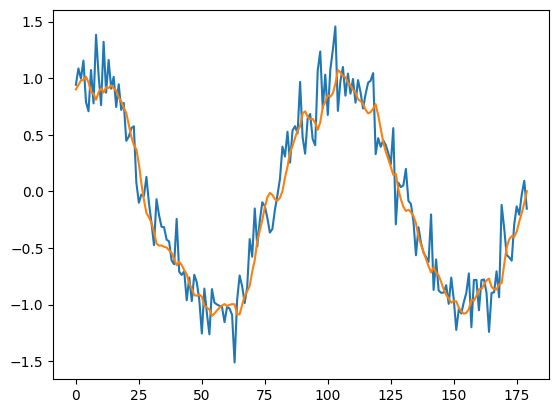

In [4]:
import matplotlib.pyplot as plt

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [3]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 20,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : False,
    'dropout_rate' : 0
}

model = ModelWrapper(type = 'gru', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test
          )

model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.08927381911831617, Val Loss: 1.7512049674987793
Epoch [2/200], Loss: 0.06319626251402952, Val Loss: 1.5674724578857422
Epoch [3/200], Loss: 0.06264671480509605, Val Loss: 1.0036873817443848
Epoch [4/200], Loss: 0.06156334082381363, Val Loss: 1.8107166290283203
Epoch [5/200], Loss: 0.060096522090461804, Val Loss: 2.0112459659576416
Epoch [6/200], Loss: 0.060070867193371666, Val Loss: 0.7214785218238831
Epoch [7/200], Loss: 0.05910006203215744, Val Loss: 1.1317192316055298
Epoch [8/200], Loss: 0.05783580351569981, Val Loss: 1.3446907997131348
Epoch [9/200], Loss: 0.05773160859651398, Val Loss: 0.7733927369117737
Epoch [10/200], Loss: 0.056525264964257076, Val Loss: 0.9762377738952637
Epoch [11/200], Loss: 0.05581124225359872, Val Loss: 1.0498837232589722
Epoch [12/200], Loss: 0.055838275171045094, Val Loss: 0.7649955153465271
Epoch [13/200], Loss: 0.05503817842189619, Val Loss: 1.670249581336975
Reduced learning rate to 0.0001
Epoch [14/200], Loss: 0.05085839489759

/home/masikol/main/UDSpredictor/usdvenv/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([180, 1])) that is different to the input size (torch.Size([180, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1.079854130744934

In [4]:
from sklearn.metrics import mean_squared_error

pred = list(map(float, model.predict(X = X_test, steps = len(y_test))))
true = list(map(float, y_test))
mse = mean_squared_error(true, pred)
print(f'{mse:10f}')

  0.479865


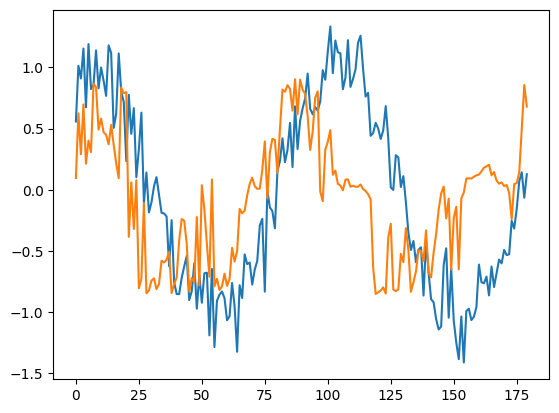

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [4]:
from DataLoaders.DataLoaderWrapper import DataLoaderWrapper

wrapper = DataLoaderWrapper(period = 'post', do_scale = True)
df = wrapper.get_data()
df

,Date,Cost
1587,2022-05-07,0.146454
1588,2022-05-08,0.146454
1589,2022-05-09,0.146454
1590,2022-05-10,0.148552
1591,2022-05-11,0.199748
...,...,...
2452,2024-09-18,0.829731
2453,2024-09-19,0.830571
2454,2024-09-20,0.846832
2455,2024-09-21,0.846832
